In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.metrics  import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, plot_confusion_matrix


In [6]:
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [16]:
len(df.customerID.unique())

7043

In [17]:
## Droping customerID columns as it is unique for each row and it wont be iuseful in our classification model
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
len(df.loc[df.TotalCharges == ' '])

11

In [36]:
df.loc[(df.TotalCharges == ' '), 'TotalCharges'] = 0

In [38]:
len(df.loc[df.TotalCharges == 0])

11

In [39]:
## Converting total charges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [40]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [41]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [45]:
df.drop(['customerID'], axis=1, inplace=True)

In [46]:
X = df.drop(['Churn'], axis=1)
y = df.Churn

In [50]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [52]:
X_encoded = pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       ])
X_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [58]:
y = y.replace('Yes', 1)
y = y.replace('No', 0)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25)

In [71]:
sum(y)/len(y)

0.2653698707936959

In [72]:
print(sum(y_test)/len(y_test))
print(sum(y_train)/len(y_train))

0.26007950028392957
0.26713366149185913


In [73]:
clf_xgb = xgb.XGBClassifier(missing=None)

In [74]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.62238
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.62634
[2]	validation_0-aucpr:0.64017
[3]	validation_0-aucpr:0.63609
[4]	validation_0-aucpr:0.64110
[5]	validation_0-aucpr:0.63530
[6]	validation_0-aucpr:0.63257
[7]	validation_0-aucpr:0.63459
[8]	validation_0-aucpr:0.63595
[9]	validation_0-aucpr:0.63560
[10]	validation_0-aucpr:0.63695
[11]	validation_0-aucpr:0.64653
[12]	validation_0-aucpr:0.64690
[13]	validation_0-aucpr:0.65094
[14]	validation_0-aucpr:0.65153
[15]	validation_0-aucpr:0.65086
[16]	validation_0-aucpr:0.65053
[17]	validation_0-aucpr:0.65000
[18]	validation_0-aucpr:0.64944
[19]	validation_0-aucpr:0.64892
[20]	validation_0-aucpr:0.65233
[21]	validation_0-aucpr:0.65215
[22]	validation_0-aucpr:0.65166
[23]	validation_0-aucpr:0.65195
[24]	validation_0-aucpr:0.64707
[25]	validation_0-aucpr:0.64767
[26]	validation_0-aucpr:0.64712
[27]	validation_0-aucpr:0.64609
[28]	validation_0-aucpr:0.64418
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

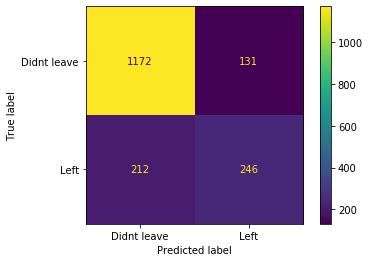

In [75]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Didnt leave', 'Left'])

In [79]:
grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10, 20, 100],
    'scale_pos_weight': [3]    
}
estimator = xgb.XGBClassifier(subsample=0.9, colsample_by_tree=0.7, seed = 4)
cv = GridSearchCV(estimator,
                 param_grid=grid,
                 scoring='roc_auc',
                 verbose=True,
                 cv = 3)

In [80]:
cv.fit(X_train, 
       y_train,
       early_stopping_rounds=10,
       eval_metric='auc',
       eval_set=[(X_test, y_test)],
       verbose=False)
print(cv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[16:18:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:18:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:18:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:18:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are 

[16:18:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:18:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:18:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are 

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.9s finished


[16:18:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [81]:
clf_xgb = xgb.XGBClassifier(
    gamma=0.25, 
    learning_rate=0.1,
    max_depth=4,
    reg_lambda=100,
    scale_pos_weight=3,
    subsample=0.9, 
    colsample_by_tree=0.7, 
    seed = 4)

clf_xgb.fit(X_train, 
            y_train,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)],
            verbose=True)

[16:22:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.53682
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.58498
[2]	validation_0-aucpr:0.58257
[3]	validation_0-aucpr:0.58044
[4]	validation_0-aucpr:0.58441
[5]	validation_0-aucpr:0.58313
[6]	validation_0-aucpr:0.59729
[7]	validation_0-aucpr:0.59739
[8]	validation_0-aucpr:0.59780
[9]	validation_0-aucpr:0.59890
[10]	validation_0-aucpr:0.60850
[11]	validation_0-aucpr:0.61186
[12]	validation_0-aucpr:0.61177
[13]	validation_0-aucpr:0.61208
[14]	validation_0-aucpr:0.61101
[15]	validation_0-aucpr:0.61272
[16]	validation_0-aucpr:0.61324
[17]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_by_tree=0.7,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.25, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=4, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=3, seed=4, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [82]:
from sklearn.metrics import accuracy_score, precision_score
y_pred = clf_xgb.predict(X_test)

In [84]:
print("Accuracy : {} Precison: {}".format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)))

Accuracy : 0.7427597955706985 Precison: 0.5033557046979866


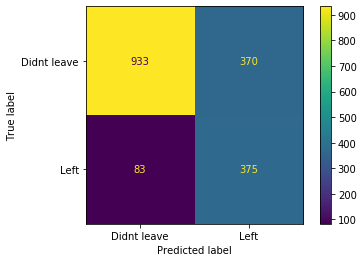

In [85]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Didnt leave', 'Left'])